# Double integration

In [3]:
%matplotlib notebook
from speed_regression import training_data as td
import numpy as np
import pandas
import sklearn.svm as svm
from sklearn.externals import joblib
from scipy.ndimage.filters import gaussian_filter1d
import matplotlib.pyplot as plt
import quaternion

import algorithms.double_integration as double_integration

nano_to_sec = 1e09

## Test linear acceleration signal

<IPython.core.display.Javascript object>


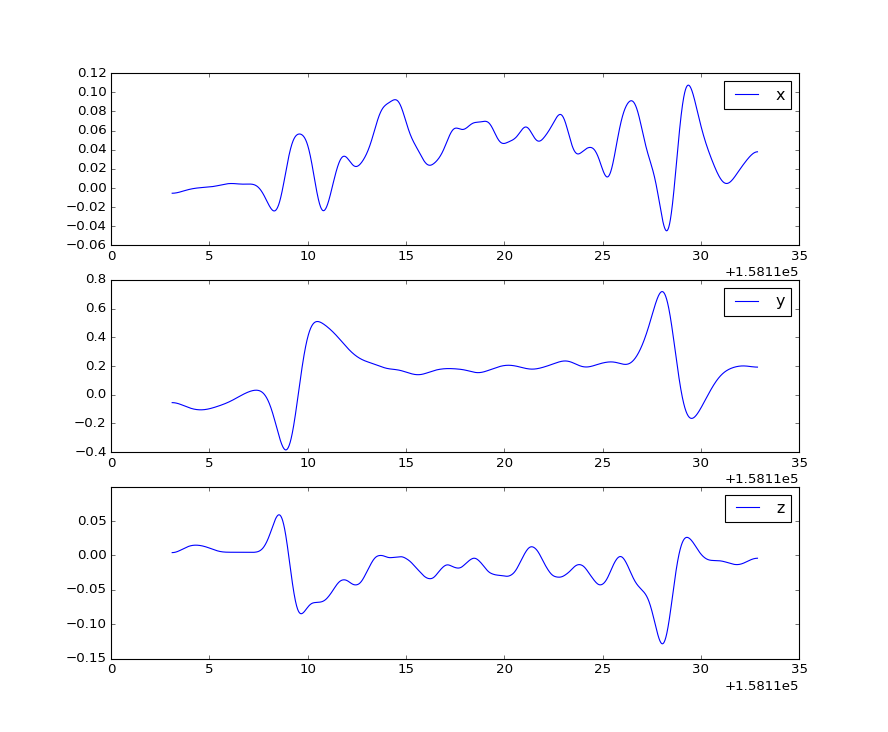

In [2]:

test_data_all = pandas.read_csv('../../data/test_line1/processed/data.csv')
linacce = test_data_all[['linacce_x', 'linacce_y', 'linacce_z']].values
time_stamp = test_data_all['time'].values / nano_to_sec

linacce = gaussian_filter1d(linacce, axis=0, sigma=50.0)
axis_names = 'xyz'
plt.figure()
for i in range(3):
    plt.subplot(311+i)
    plt.plot(time_stamp, linacce[:, i])
    plt.legend(axis_names[i])

## Naive double integration

<IPython.core.display.Javascript object>


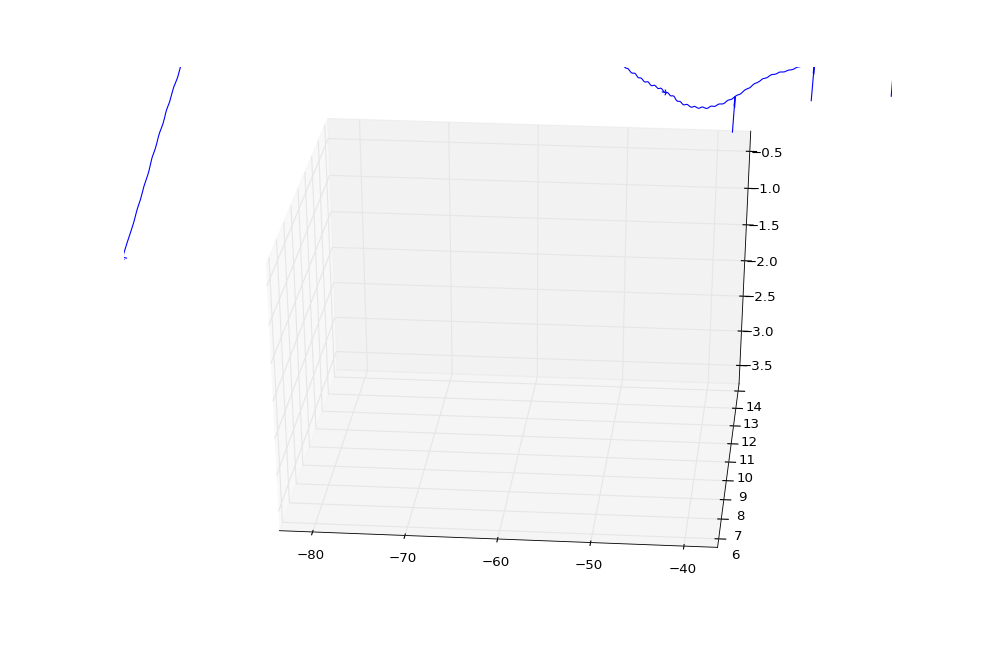

In [4]:
data_all = pandas.read_csv('../../data/20170126021927/processed/data.csv')
time_stamp = data_all['time'].values / nano_to_sec
rotations = data_all[['ori_w', 'ori_x', 'ori_y', 'ori_z']].values
linacce = data_all[['linacce_x', 'linacce_y', 'linacce_z']].values
positions = double_integration.IMU_double_integration(t=time_stamp, rotation=rotations, acceleration=linacce)
plt.figure()

rot_vec_sample = np.arange(0, positions.shape[0], 500, dtype=np.int)
quat_array = quaternion.as_quat_array(rotations[rot_vec_sample])

# array used for visualize oritation
orientation_sampled = np.empty([rot_vec_sample.shape[0], 3], dtype=np.float)
for i in range(rot_vec_sample.shape[0]):
    rotated = quat_array[i] * quaternion.quaternion(0, 0, 1, 0) * quat_array[i].conj()
    orientation_sampled[i, :] = rotated.vec
orientation_position = positions[rot_vec_sample]

ax = plt.subplot(111, projection='3d')
heading = int(positions.shape[0] / 10)
ax.plot(positions[:heading, 0], positions[:heading, 1], positions[:heading, 2], 'r')
ax.plot(positions[heading:, 0], positions[heading:, 1], positions[heading:, 2], 'b')
ax.quiver(orientation_position[:, 0], orientation_position[:, 1], orientation_position[:, 2],
           orientation_sampled[:, 0], orientation_sampled[:, 1], orientation_sampled[:, 2],
           length=0.5)